In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import preprocessing
from sklearn import model_selection



In [2]:
df=pd.read_csv("D:\\DATA SCIENCE BY ME\\Project\\resume project\\bank-marketing-analysis-master\\bank-marketing-analysis-master\\banking_updated.csv")

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp_var_rate      41188 non-null float64
cons_price_idx    41188 non-null float64
cons_conf_idx     41188 non-null float64
euribor3m         41188 non-null float64
nr_employed       41188 non-null float64
y                 41188 non-null int64
dtypes: float64(5), int64(6), object(10)
memory usag

In [5]:
df.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp_var_rate      41188 non-null float64
cons_price_idx    41188 non-null float64
cons_conf_idx     41188 non-null float64
euribor3m         41188 non-null float64
nr_employed       41188 non-null float64
y                 41188 non-null int64
dtypes: float64(5), int64(6), object(10)
memory usag

In [7]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

### Visualizing the Data

In [9]:
import seaborn as sns

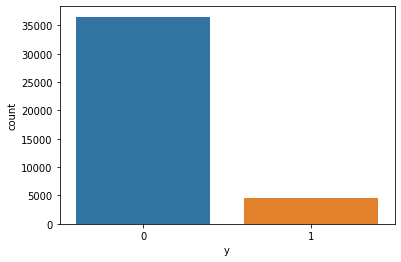

In [12]:
sns.countplot(x ='y', data=df)

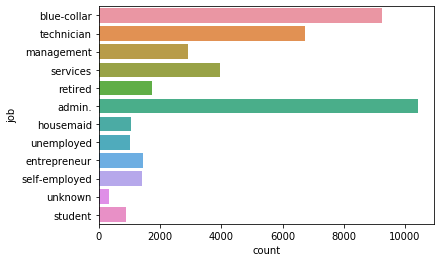

In [17]:
sns.countplot(y= 'job' , data = df)

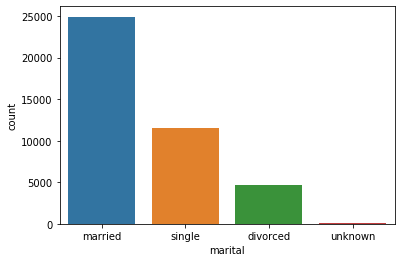

In [18]:
sns.countplot(x='marital' , data =df )

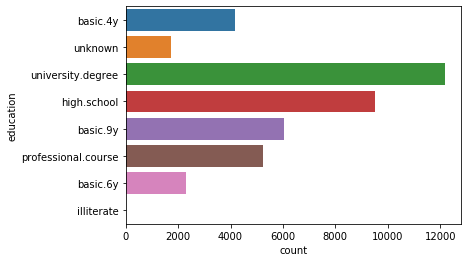

In [20]:
sns.countplot(y='education' , data = df)

# Pre Processing
Sklearn provides a very efficient tool for encoding the levels of a categorical features into numeric values.
`LabelEncoder` encode labels with value between 0 and n_classes-1

In [32]:
df.drop(['default' ,'contact' , 'month' , 'day_of_week' , 'pdays'] , axis=1 , inplace =True)

In [33]:
df.head()

,age,job,marital,education,housing,loan,duration,campaign,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,1,married,basic.4y,yes,no,210,1,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,9,married,unknown,no,no,138,1,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,4,single,university.degree,yes,no,339,3,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,7,married,high.school,no,no,185,2,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,5,married,basic.4y,yes,no,137,1,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [31]:
le = preprocessing.LabelEncoder()

In [34]:
df.job=le.fit_transform(df.job)
df.marital=le.fit_transform(df.marital)
df.education=le.fit_transform(df.education)
df.housing=le.fit_transform(df.housing)
df.loan=le.fit_transform(df.loan)
df.poutcome=le.fit_transform(df.poutcome)

In [35]:
df.head()

,age,job,marital,education,housing,loan,duration,campaign,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,1,1,0,2,0,210,1,0,1,1.4,93.444,-36.1,4.963,5228.1,0
1,53,9,1,7,0,0,138,1,0,1,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,4,2,6,2,0,339,3,2,2,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,7,1,3,0,0,185,2,0,1,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,5,1,0,2,0,137,1,1,2,-2.9,92.201,-31.4,0.869,5076.2,1


In [36]:
df.shape

(41188, 16)

In [41]:
X=df.iloc[:,0:14]

In [39]:
X[0:10]

,age,job,marital,education,housing,loan,duration,campaign,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m
0,44,1,1,0,2,0,210,1,0,1,1.4,93.444,-36.1,4.963
1,53,9,1,7,0,0,138,1,0,1,-0.1,93.200,-42.0,4.021
2,28,4,2,6,2,0,339,3,2,2,-1.7,94.055,-39.8,0.729
3,39,7,1,3,0,0,185,2,0,1,-1.8,93.075,-47.1,1.405
4,55,5,1,0,2,0,137,1,1,2,-2.9,92.201,-31.4,0.869
5,30,4,0,0,2,0,68,8,0,1,1.4,93.918,-42.7,4.961
6,37,1,1,0,2,0,204,1,0,1,-1.8,92.893,-46.2,1.327
7,39,1,0,2,2,0,191,1,0,1,-1.8,92.893,-46.2,1.313
8,36,0,1,6,0,0,174,1,1,2,-2.9,92.963,-40.8,1.266
9,27,1,2,0,2,0,191,2,1,0,-1.8,93.075,-47.1,1.410


In [46]:
y=df.iloc[:,15]

In [47]:
y[0:10]

0    0
1    0
2    1
3    0
4    1
5    0
6    0
7    0
8    1
9    0
Name: y, dtype: int64

# Train and Test split
A general practice is to split your data into a training and test set. You train/tune your model with your training set
and test how well it generalizes to data it has never seen before with your test set. We will make use 
of scikit learn’s train_test_split method to achieve this

In [55]:
x_train , x_test , y_train, y_test=model_selection.train_test_split(X, y, test_size=0.2, random_state=0)

In [56]:
x_train.shape, y_train.shape

((32950, 14), (32950,))

In [57]:
x_test.shape, y_test.shape

((8238, 14), (8238,))

### Training the model
We will make use of different classification algorithms to train this data set and will record the accuracy on test set.

#### Logistic Regression

In [53]:
model=LogisticRegression(penalty='l2', max_iter=1000)

In [58]:
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [59]:
prediction=model.predict(x_test)

In [60]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, prediction)

0.9089584850691915